# Newton-Cotes: Symbolische Herleitung

Die allgemeine Form einer Quadraturformel nach Vorlesung ist
$$I_n(f)=\sum_{j=0}^n A_j f(x_j)$$
für die Approximation eines Integrals der Form
$$I(f)=\int_a^b f(x) dx.$$
Mit dem $w_j$ der Lagrange-Formeln gilt für die Newton-Cotes-Quadraturformeln
$$A_j=\int _a^b w(x) w_j(x).$$

Wir berechnen symbolisch einige zugehörige Gewichte für geschlossene und offene Newton-Cotes-Formeln.

In [1]:
import numpy as np
import sympy
import math
import matplotlib.pyplot as plt

In [2]:
# Stützstellen
def offen(n):
    x=[a+k*(b-a)/(n+2) for k in range(1,n+2)]
    return x
def geschlossen(n):
    x=[a+k*(b-a)/n for k in range(0,n+1)]
    return x

def NewtonCotes(w,x):
    X=sympy.symbols("x")
    w=1
    ret=[]
    n=len(x)-1
    a=sympy.Integer(0)
    b=sympy.Integer(1)
    

    for k in range(0,n+1):
        wk=1
        for j in range(0,n+1):
            if (j!= k):
                wk=wk*(X-x[j])/(x[k]-x[j])
        z=sympy.integrate(w*wk,(X,a,b))
        ret.append(z)
    return ret

Und ein paar Tests. Achtung: Für die Werte des Skripts, geschlossene Formeln, muss nochmal mit n multipliziert werden.

In [3]:
a=sympy.Integer(0)
b=sympy.Integer(1)
for i in range(0,10):
    print(i,NewtonCotes(1,offen(i)))
    print(i,NewtonCotes(1,geschlossen(i)))

0 [1]
0 [1]
1 [1/2, 1/2]
1 [1/2, 1/2]
2 [2/3, -1/3, 2/3]
2 [1/6, 2/3, 1/6]
3 [11/24, 1/24, 1/24, 11/24]
3 [1/8, 3/8, 3/8, 1/8]
4 [11/20, -7/10, 13/10, -7/10, 11/20]
4 [7/90, 16/45, 2/15, 16/45, 7/90]
5 [611/1440, -151/480, 281/720, 281/720, -151/480, 611/1440]
5 [19/288, 25/96, 25/144, 25/144, 25/96, 19/288]
6 [92/189, -106/105, 244/105, -2459/945, 244/105, -106/105, 92/189]
6 [41/840, 9/35, 9/280, 34/105, 9/280, 9/35, 41/840]
7 [1787/4480, -2803/4480, 4967/4480, -1711/4480, -1711/4480, 4967/4480, -2803/4480, 1787/4480]
7 [751/17280, 3577/17280, 49/640, 2989/17280, 2989/17280, 49/640, 3577/17280, 751/17280]
8 [4045/9072, -835/648, 8335/2268, -27535/4536, 33911/4536, -27535/4536, 8335/2268, -835/648, 4045/9072]
8 [989/28350, 2944/14175, -464/14175, 5248/14175, -454/2835, 5248/14175, -464/14175, 2944/14175, 989/28350]
9 [393211/1036800, -6603199/7257600, 391847/181440, -1067851/453600, 4445629/3628800, 4445629/3628800, -1067851/453600, 391847/181440, -6603199/7257600, 393211/1036800]
9 [

Bemerkung: Bei den Formeln hoher Ordnung treten teilweise negative Werte auf, was zu Auslöschung führt.

# Fehlerbetrachtung

Wir nutzen nun diese Formeln zur Berechnung des Integrals der Exponentialfunktion auf $[0,1]$.

In [4]:
f=math.exp
for i in range(1,8):
    x=geschlossen(i)
    A=NewtonCotes(1,x)
    sum=0
    for k in range(0,i+1):
        sum=sum+A[k]*math.exp(x[k])
    print(i,sum,sum-(math.exp(1)-1))

1 1.85914091422952 0.140859085770477
2 1.71886115187659 0.000579323417547961
3 1.71854015336017 0.000258324901122542
4 1.71828268792476 8.59465712599317e-7
5 1.71828231299048 4.84531436528712e-7
6 1.71828182951772 1.05867625777023e-9
7 1.71828182910858 6.49539755315232e-10


Wir bemerken: Beim Übergang von geraden zu ungeraden Ordnungen erhält man kaum eine Verbesserung.

# Zusammengesetzte Formeln

Schon bei der Polynominterpolation haben wir gesehen, dass es nichts bringt, hohe Polynomgrade zu verwenden. Entsprechend gehen wir bei der Integration, wie bei der Interpolation, auf die Betrachtung kleiner Intervalle zurück. Angenommen, wir haben $N+1$ Auswertungen einer Funktion. Dann können wir entweder eine Integration mit einem Polynom der Ordnung $N$ machen, oder $N/p$ mit Integrationen der Ordnung $p$. Wir untersuchen die Auswirkungen wieder am Beispiel der Exponentialfunktion.

In [5]:
f=math.exp
N=64
Nlog2=N.bit_length()
x=geschlossen(N)
y=[f(w) for w in x]
for i in range(0,Nlog2):
    p=pow(2,Nlog2-1-i)
    A=NewtonCotes(1,geschlossen(p))
    sum=0
    M=N//p
    for k in range(0,M):
        for j in range(0,p+1):
            sum=sum+A[j]*y[k*p+j]
    sum=sum/M
    print(p,sum,sum-(f(1)-1))

64 1.73748698478794 0.0192051563288926
32 1.71828182844392 -1.51230139522340e-11
16 1.71828182845905 1.55431223447522e-15
8 1.71828182845905 4.44089209850063e-16
4 1.71828182845910 5.26245713672324e-14
2 1.71828182902802 5.68971092462789e-10
1 1.71831678685009 3.49583910477236e-5


Wie erwartet, nimmt die Genauigkeit von unten nach oben (also bei steigendem Polynomgrad) erst zu, dann wieder ab. Und dies ist ja noch ein optimaler Fall - die Ableitungen der Exponentialfunktion sind beschränkt. Wir machen das Gleiche mal für das Rungebeispiel. Hier ist der Fehlerverlauf kaum noch vorhersagbar.

In [6]:
def f(x):
    x=-1+2*x
    return 1/(1+25*x*x)

N=64
Nlog2=N.bit_length()
x=geschlossen(N)
y=[f(w) for w in x]
for i in range(0,Nlog2):
    p=pow(2,Nlog2-1-i)
    A=NewtonCotes(1,geschlossen(p))
    sum=0
    M=N//p
    for k in range(0,M):
        for j in range(0,p+1):
            sum=sum+A[j]*y[k*p+j]
    sum=float(sum)/M
    print(p,sum,sum-(math.atan(5)/5))

64 -15099933.98366365 -15099934.258343803
32 0.2746802020386548 4.864965158501988e-08
16 0.2746802300442657 7.665526252642607e-08
8 0.2746797494458652 -4.0394313799430037e-07
4 0.27468075398173863 6.005927354335583e-07
2 0.2746801488390784 -4.549924825791862e-09
1 0.27467413518567885 -6.018203324353877e-06


Also: Bei den Quadraturformeln sind die sehr einfachen (Trapez, Simpson) sehr beliebt, die Formeln hoher Ordnung hängen wieder von den (unbekannten) Ableitungen hoher Ordnung von $f$ ab.

# Romberg-Verfahren

Gegeben seien wieder $(n+1)$ äquidistante Auswertungen der Funktion $f$ im Interval $[a,b]$. Wir berechnen Näherungen an das Integral mit Hilfe der Trapezregel. Dazu nutzen wir im ersten Schritt jede Auswertung, im zweiten jede zweite, im dritten jede vierte usw.

In [7]:
f=math.exp
N=16
Nlog2=N.bit_length()
x=geschlossen(N)
y=[f(w) for w in x]

error=1
trapez=[]
schritt=[]

for i in range(0,Nlog2):
    p=pow(2,i)
    M=N//p
    Y=[y[k] for k in range(0,N+1,p)]
    X=[x[k] for k in range(0,N+1,p)]
    sum=(Y[0]+Y[M])/2
    for j in range(1,M):
        sum=sum+Y[j]
    sum=sum/M
    trapez.append(sum)
    schritt.append(1/M)
    lasterror=error
    error=sum-(f(1)-1)
    print(M,sum,error,error/lasterror)

16 1.7188411285799947 0.000559300120949624 0.000559300120949624
8 1.7205185921643018 0.002236763705256717 3.999219062314813
4 1.7272219045575168 0.008940076098471694 3.996879991150262
2 1.7539310924648253 0.03564926400578017 3.987579480657263
1 1.8591409142295225 0.14085908577047745 3.9512480747888254


Wie erwartet: Je kleiner die Intervalle (je größer die Anzahl der Auswertungen), umso besser ist das Ergebnis. Wir halten weiter fest: Bei Halbierung der Schrittweite wird der Fehler um einen Faktor $4$ kleiner, der Fehler ist entwickelbar in $h^2$. Wir wenden also das Romberg-Verfahren an mit $p=2$.

In [8]:
%%capture
%run ../Interpolation/Polynominterpolation.ipynb

In [9]:
t=np.array(schritt)
y=np.array(trapez)
t2=[h**2 for h in t]
A=neville_auswertung(t2,y,0)
np.set_printoptions(precision=4)
print('Werte:')
print(A)
print('Genauigkeit:')
print(A-(f(1)-1))

Werte:
[[1.7188 1.7183 1.7183 1.7183 1.7183]
 [0.     1.7205 1.7183 1.7183 1.7183]
 [0.     0.     1.7272 1.7183 1.7183]
 [0.     0.     0.     1.7539 1.7189]
 [0.     0.     0.     0.     1.8591]]
Genauigkeit:
[[1.7188 1.7183 1.7183 1.7183 1.7183]
 [0.     1.7205 1.7183 1.7183 1.7183]
 [0.     0.     1.7272 1.7183 1.7183]
 [0.     0.     0.     1.7539 1.7189]
 [0.     0.     0.     0.     1.8591]]


Wie beim Richardson-Verfahren steht der beste ermittelte Wert rechts oben in der Matrix, mit einer Genauigkeit von $10^{-14}$.

# Gauss-Formeln

Bei den Gauss-Formeln nutzen wir als Stützstellen die Nullstellen der orthogonalen Polynome, für $w=1$ also der Legendre-Polynome. Die Nullstellen sind vertafelt, aber auch durch eine geeignete Python-Funktion auffindbar, die auch gleich noch die benötigten Gewichte mit berechnet.

Für unser Beispiel der Exponentialfunktion hat man schon mit wenigen Auswertungen eine hohe Genauigkeit.

In [10]:
import scipy.special
def gauss(f,a,b,n):
    (x,A)=scipy.special.roots_legendre(n)
    x=(x+1)*(b-a)/2+a
    A=A*(b-a)/2
    print(x)
    sum=0
    for j in range(0,n):
        sum=sum+f(x[j])*A[j]
    return sum

print(gauss(math.exp,0,1,2)-(math.exp(1)-1))
print(gauss(math.exp,0,1,3)-(math.exp(1)-1))
print(gauss(math.exp,0,1,4)-(math.exp(1)-1))
print(gauss(math.cos,-0.4,1,4)-(math.sin(1)-math.sin(-0.4)))

def runge(x):
    x=-1+2*x
    return 1/(1+25*x*x)

print(gauss(runge,-1,1,5)-(math.atan(5)/5))

[0.2113 0.7887]
-0.0003854504515410362
[0.1127 0.5    0.8873]
-8.240865234654393e-07
[0.0694 0.33   0.67   0.9306]
-9.329670369595533e-10
[-0.3028  0.062   0.538   0.9028]
-1.0967197372480086e-08
[-0.9062 -0.5385  0.      0.5385  0.9062]
0.18325790718817253


# Harmonische Analyse

Wir testen unsere Aussagen zur harmonischen Analyse an einem Beispiel.

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]
[1.5462526341887264, 4.440892098500626e-16, 2.220446049250313e-16, 8.881784197001252e-16, 0.0, 2.220446049250313e-16, 2.220446049250313e-16, 4.440892098500626e-16, 2.220446049250313e-16, 0.0]


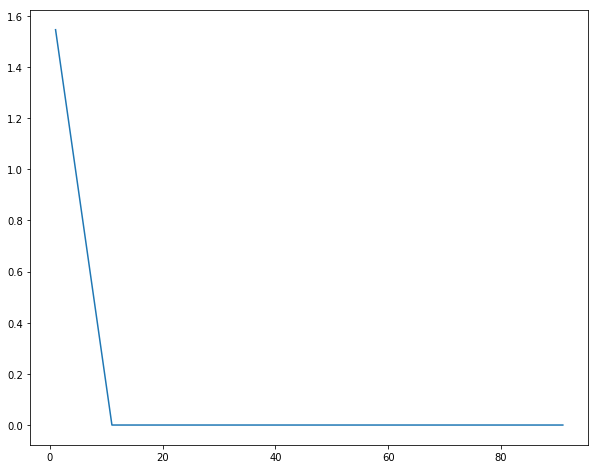

In [11]:
def f(x):
    return math.sin(x)**10

exakt=63/128*math.pi
def trapez(a,b,N):
    x=np.linspace(a,b,N+1)
    y=[f(w) for w in x]
    sum=np.sum(y[0:N])
    return sum*(b-a)/N

X=[]
Y=[]
for N in range(1,100,10):
    X.append(N)
    Y.append(abs(trapez(0,math.pi*2,N)-exakt))

print(X)
print(Y)

plt.plot(X,Y)

Die Konvergenz ist so schnell, dass man nicht sieht...

# Stabilität

Für die Stabilität untersuchen wir zusammengesetzte Formeln mit positiven Gewichten und negativen Gewichten.

In [12]:
def f(x):
    return math.exp(x)
def fnoisy(x):
    return math.exp(x)+np.random.rand()*1e-10
def zusammengesetzt(p,gewichte,a,b,f):
    length=(b-a)/p
    n=len(gewichte)
    h=length/(n-1)
    sum=0
    for i in range(0,n):
        for j in range(0,p):
            sum=sum+gewichte[i]*h*(n-1)*f(a+j*length+i*h)
    return sum

korrekt=math.exp(1)-math.exp(0)
gewichte=np.array(NewtonCotes(1,geschlossen(5)),float)
print(gewichte)
print(zusammengesetzt(10,gewichte,0,1,f)-korrekt)
print(zusammengesetzt(10,gewichte,0,1,fnoisy)-korrekt)
gewichte=np.array(NewtonCotes(1,geschlossen(20)),float)
print(gewichte)
print(zusammengesetzt(10,gewichte,0,1,f)-korrekt)
print(zusammengesetzt(10,gewichte,0,1,fnoisy)-korrekt)

[0.066  0.2604 0.1736 0.1736 0.2604 0.066 ]
4.998224056862455e-13
5.238809386298726e-11
[ 1.1825e-02  1.1414e-01 -2.3648e-01  1.2062e+00 -3.7710e+00  1.0337e+01
 -2.2709e+01  4.1828e+01 -6.4075e+01  8.2797e+01 -9.0005e+01  8.2797e+01
 -6.4075e+01  4.1828e+01 -2.2709e+01  1.0337e+01 -3.7710e+00  1.2062e+00
 -2.3648e-01  1.1414e-01  1.1825e-02]
-4.884981308350689e-15
8.492986314223572e-10


Ergebnis: Bei Verwendung von Formeln mit positiven Gewichten ist der Fehler bei gestörtem Integranden viel besser, als bei Verwendung von Formeln mit positiven und negativen Gewichten (Faktor 100), obwohl die Formel bei exaktem Integranden bessere Ergebnisse liefert.